**Question 1)**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Network/ionosphere.data', header = None)

In [38]:
data_x = df.loc[:, df.columns != 34]
data_y = df.loc[:, df.columns == 34]

In [39]:
del data_x[1]

In [40]:
data_y = pd.get_dummies(data_y)
data_y.drop(columns='34_b', inplace=True)
data_y.columns = ['Type']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

this function will plot accuracy and loss of train and validation data:

In [49]:
def plot_training_info(result):
  fig = plt.figure(num=None, figsize=(20 , 5), dpi=60, facecolor='w', edgecolor='k')
  plt.subplot(1 , 2 , 1)
  plt.plot(range(len(result.history['loss'])), result.history['loss'], color = 'blue')
  plt.plot(range(len(result.history['val_loss'])), result.history['val_loss'], color = 'red')
  plt.xlabel('epoch', fontsize=20)
  plt.ylabel('loss', fontsize=20)
  plt.subplot(1 , 2 , 2)
  plt.plot(range(len(result.history['accuracy'])), result.history['accuracy'], color = 'blue')
  plt.plot(range(len(result.history['val_accuracy'])), result.history['val_accuracy'], color = 'red')
  plt.xlabel('epoch', fontsize=20)
  plt.ylabel('accuracy', fontsize=20)
  plt.tight_layout()
  plt.show()

This function will print confusion matrix:

In [50]:
def print_classification_reports(y_test, y_pred):
  print("Classification Reports:")
  print(classification_report(y_test, y_pred))
  print("\nConfusion Matrix:")
  conf_mat = confusion_matrix(y_test, y_pred)
  d = {"Bad": [conf_mat[0][0], conf_mat[0][1]] , "Good": [conf_mat[1][0], conf_mat[1][1]]}
  print ("{:<5} {:<5} {:<5}".format('','Bad','Good'))
  for k, v in d.items():
    bad, good = v
    print ("{:<5} {:<5} {:<5}".format(k, bad, good))

**ب)**

first model:

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim = 33, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result = model.fit(x=x_train, y=y_train, epochs=40, validation_split=0.3)

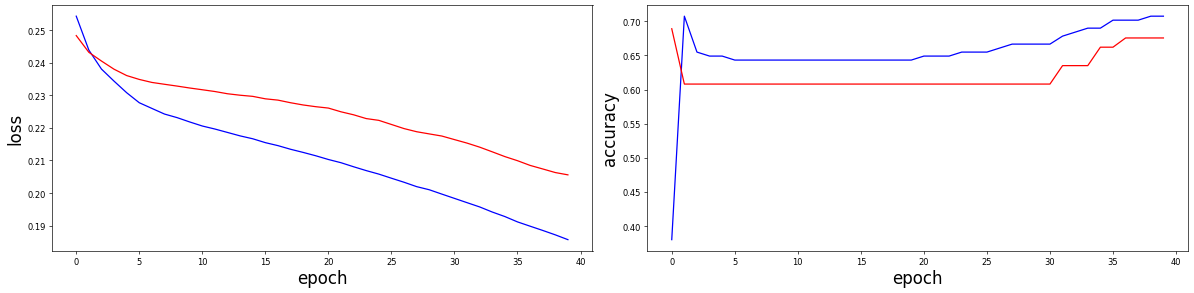

In [80]:
plot_training_info(result)

In [81]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.19      0.33        36
           1       0.71      1.00      0.83        70

    accuracy                           0.73       106
   macro avg       0.85      0.60      0.58       106
weighted avg       0.81      0.73      0.66       106


Confusion Matrix:
      Bad   Good 
Bad   7     29   
Good  0     70   


Second model:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result2 = model.fit(x=x_train, y=y_train, batch_size=30, epochs=40, validation_split=0.3)

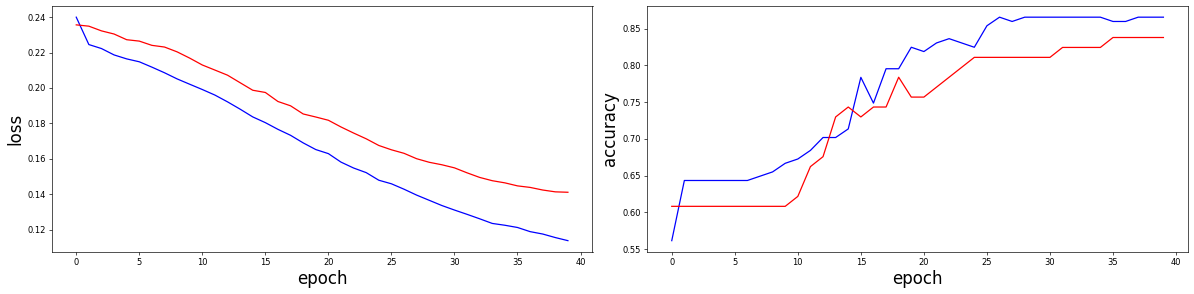

In [77]:
plot_training_info(result2)

In [78]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        36
           1       0.85      0.97      0.91        70

    accuracy                           0.87       106
   macro avg       0.89      0.82      0.84       106
weighted avg       0.87      0.87      0.86       106


Confusion Matrix:
      Bad   Good 
Bad   24    12   
Good  2     68   


Third model:

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim = 33, activation='sigmoid'))
model.add(Dense(800, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result3 = model.fit(x=x_train, y=y_train, batch_size=30, epochs=40, validation_split=0.3)

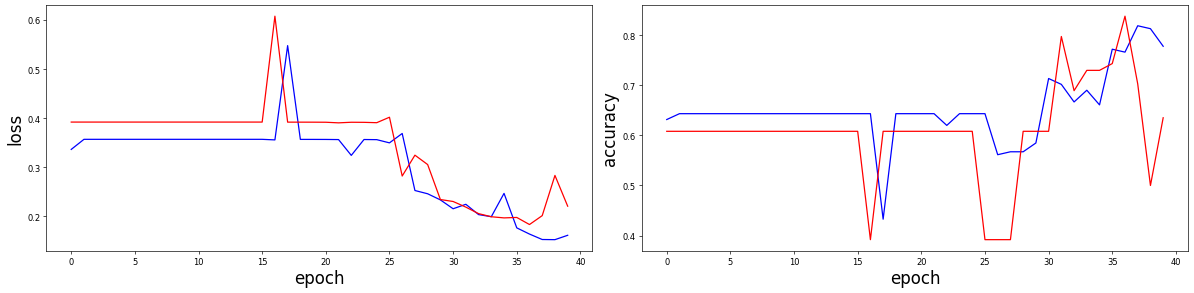

In [74]:
plot_training_info(result3)

In [75]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.55      0.97      0.70        36
           1       0.98      0.59      0.73        70

    accuracy                           0.72       106
   macro avg       0.76      0.78      0.72       106
weighted avg       0.83      0.72      0.72       106


Confusion Matrix:
      Bad   Good 
Bad   35    1    
Good  29    41   


ج)

batch size = 32:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result1 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

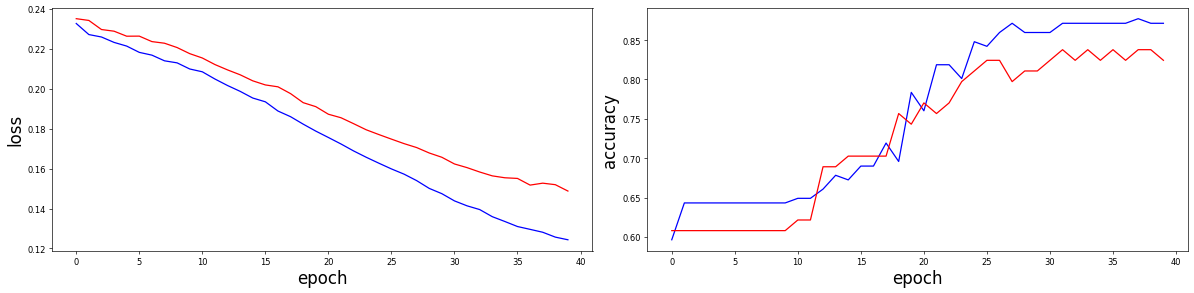

In [83]:
plot_training_info(result1)

In [84]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.96      0.69      0.81        36
           1       0.86      0.99      0.92        70

    accuracy                           0.89       106
   macro avg       0.91      0.84      0.86       106
weighted avg       0.90      0.89      0.88       106


Confusion Matrix:
      Bad   Good 
Bad   25    11   
Good  1     69   


batch size = 64

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result2 = model.fit(x=x_train, y=y_train, batch_size=64, epochs=40, validation_split=0.3)

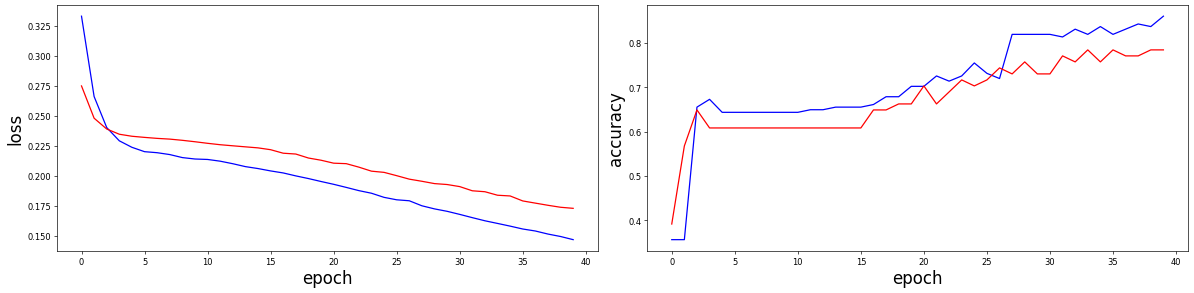

In [92]:
plot_training_info(result2)

In [93]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77        36
           1       0.84      0.99      0.91        70

    accuracy                           0.87       106
   macro avg       0.90      0.81      0.84       106
weighted avg       0.88      0.87      0.86       106


Confusion Matrix:
      Bad   Good 
Bad   23    13   
Good  1     69   


batch size = 256

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result3 = model.fit(x=x_train, y=y_train, batch_size=256, epochs=40, validation_split=0.3)

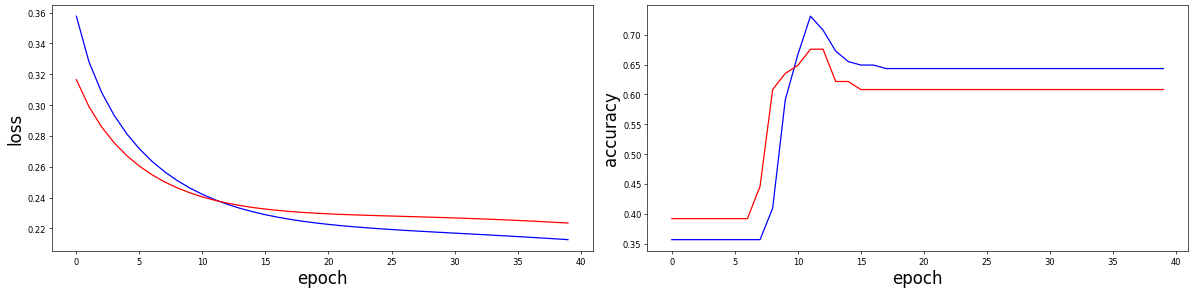

In [95]:
plot_training_info(result3)

In [96]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.66      1.00      0.80        70

    accuracy                           0.66       106
   macro avg       0.33      0.50      0.40       106
weighted avg       0.44      0.66      0.53       106


Confusion Matrix:
      Bad   Good 
Bad   0     36   
Good  0     70   


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


د)

1- using Relu activation function:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result1 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

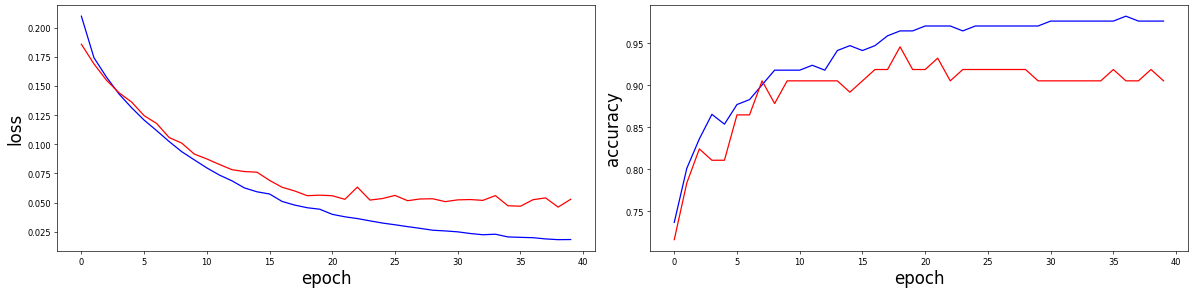

In [98]:
plot_training_info(result1)

In [99]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.95      0.99      0.97        70

    accuracy                           0.95       106
   macro avg       0.96      0.94      0.95       106
weighted avg       0.95      0.95      0.95       106


Confusion Matrix:
      Bad   Good 
Bad   32    4    
Good  1     69   


2- Using Tanh activation function:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result2 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

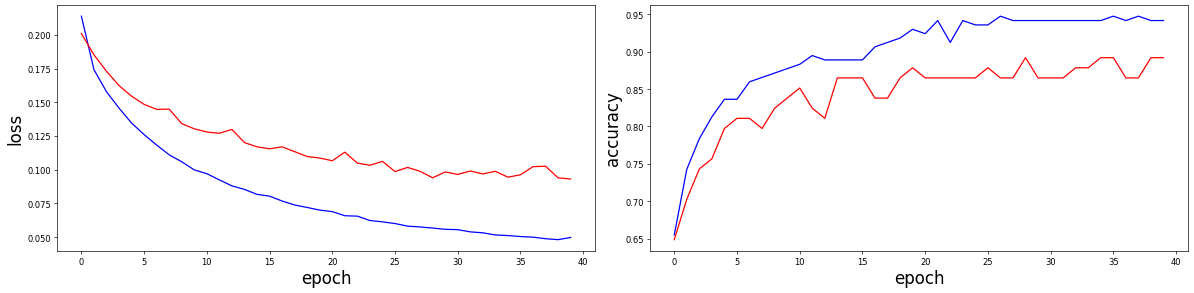

In [101]:
plot_training_info(result2)

In [102]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        36
           1       0.84      0.96      0.89        70

    accuracy                           0.85       106
   macro avg       0.86      0.80      0.82       106
weighted avg       0.85      0.85      0.84       106


Confusion Matrix:
      Bad   Good 
Bad   23    13   
Good  3     67   


3-Using Leaky Relu:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.metrics.mean_squared_error)
result3 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

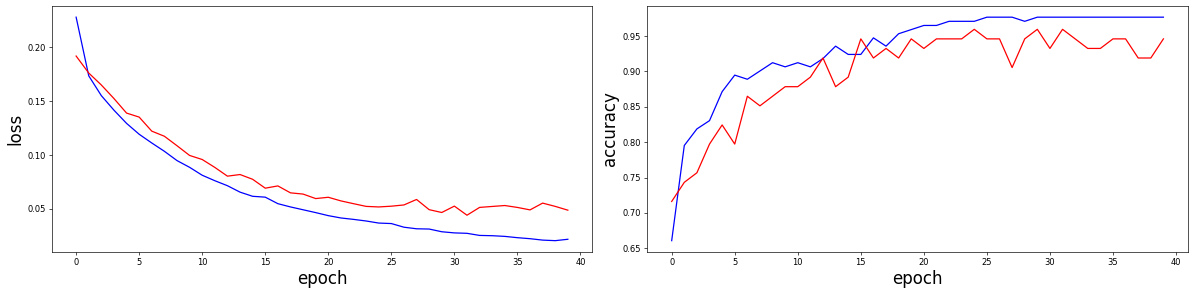

In [107]:
plot_training_info(result3)

In [108]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.97      1.00      0.99        70

    accuracy                           0.98       106
   macro avg       0.99      0.97      0.98       106
weighted avg       0.98      0.98      0.98       106


Confusion Matrix:
      Bad   Good 
Bad   34    2    
Good  0     70   


ه)

1- binary cross entropy:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = 'binary_crossentropy')
result1 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

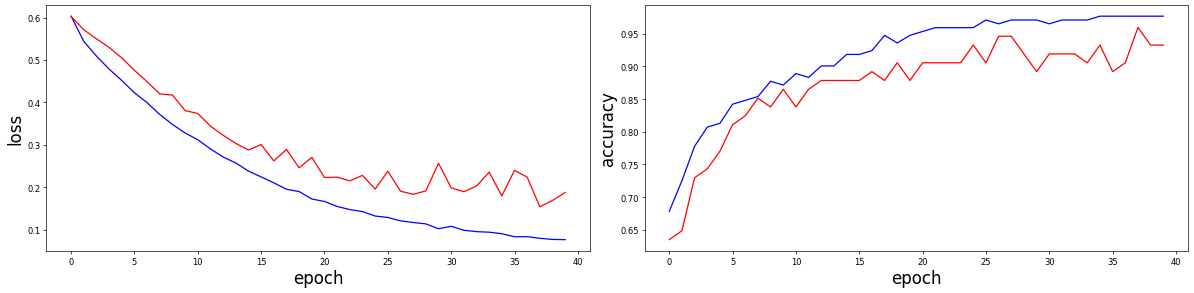

In [110]:
plot_training_info(result1)

In [111]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        36
           1       0.93      0.99      0.96        70

    accuracy                           0.94       106
   macro avg       0.95      0.92      0.94       106
weighted avg       0.94      0.94      0.94       106


Confusion Matrix:
      Bad   Good 
Bad   31    5    
Good  1     69   


2- Mean Absolute Error:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.losses.mean_absolute_error)
result2 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

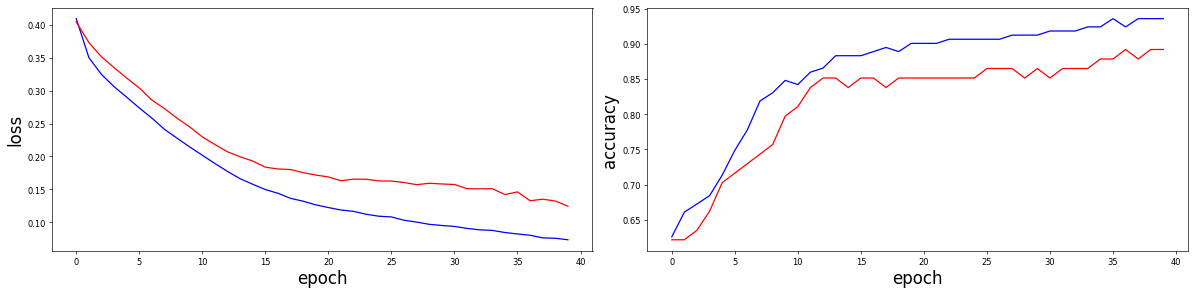

In [113]:
plot_training_info(result2)

In [114]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.95      1.00      0.97        70

    accuracy                           0.96       106
   macro avg       0.97      0.94      0.96       106
weighted avg       0.96      0.96      0.96       106


Confusion Matrix:
      Bad   Good 
Bad   32    4    
Good  0     70   


و)

1-adam:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.losses.mean_squared_error, optimizer='adam')
result1 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

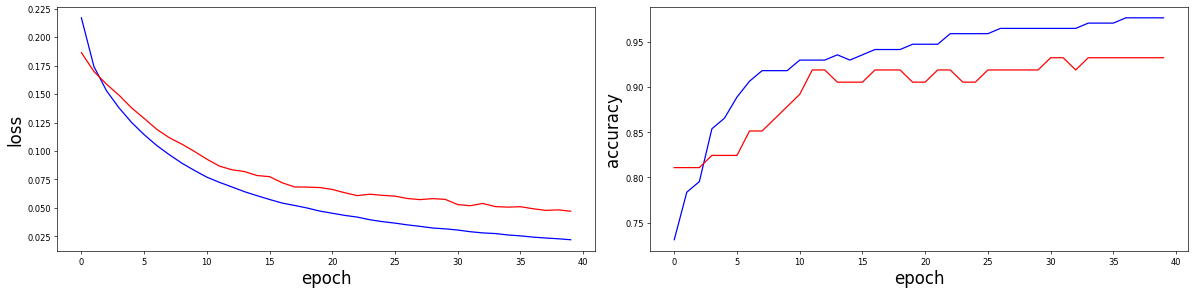

In [125]:
plot_training_info(result1)

In [126]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.95      1.00      0.97        70

    accuracy                           0.96       106
   macro avg       0.97      0.94      0.96       106
weighted avg       0.96      0.96      0.96       106


Confusion Matrix:
      Bad   Good 
Bad   32    4    
Good  0     70   


2- SGD

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=0.01))
result2 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

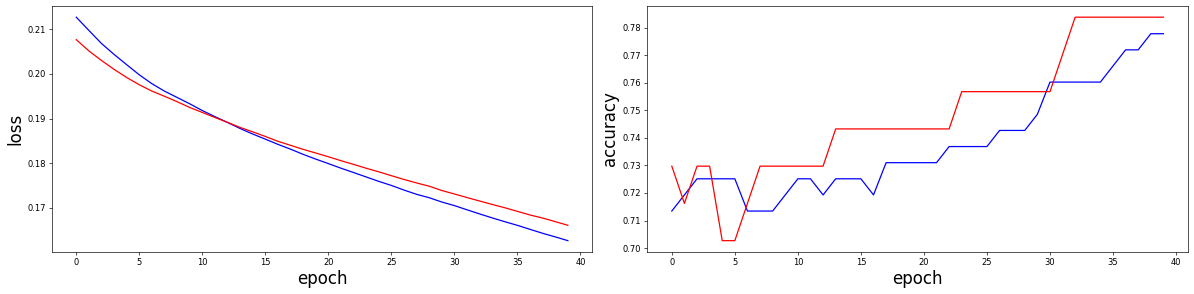

In [128]:
plot_training_info(result2)

In [129]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        36
           1       0.75      1.00      0.86        70

    accuracy                           0.78       106
   macro avg       0.88      0.68      0.69       106
weighted avg       0.84      0.78      0.75       106


Confusion Matrix:
      Bad   Good 
Bad   13    23   
Good  0     70   


ح)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(16, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.losses.mean_squared_error, optimizer='adam')
result1 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

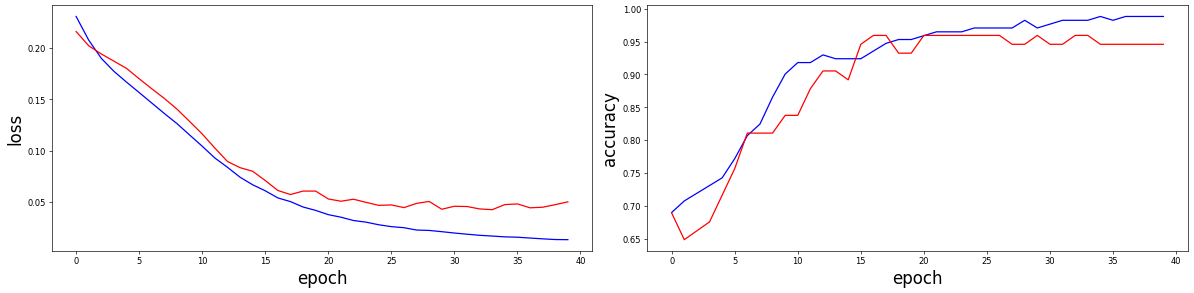

In [131]:
plot_training_info(result1)

In [132]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.97      1.00      0.99        70

    accuracy                           0.98       106
   macro avg       0.99      0.97      0.98       106
weighted avg       0.98      0.98      0.98       106


Confusion Matrix:
      Bad   Good 
Bad   34    2    
Good  0     70   


Second model:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(16, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(8, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.losses.mean_squared_error, optimizer='adam')
result2 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

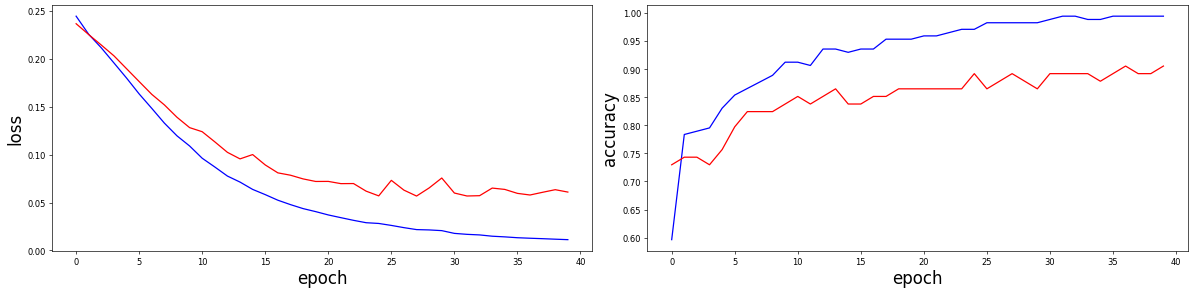

In [134]:
plot_training_info(result2)

In [135]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.95      1.00      0.97        70

    accuracy                           0.96       106
   macro avg       0.97      0.94      0.96       106
weighted avg       0.96      0.96      0.96       106


Confusion Matrix:
      Bad   Good 
Bad   32    4    
Good  0     70   


Third model:

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = 33, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(16, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(8, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(8, activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(metrics = ['accuracy'], loss = keras.losses.mean_squared_error, optimizer='adam')
result3 = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, validation_split=0.3)

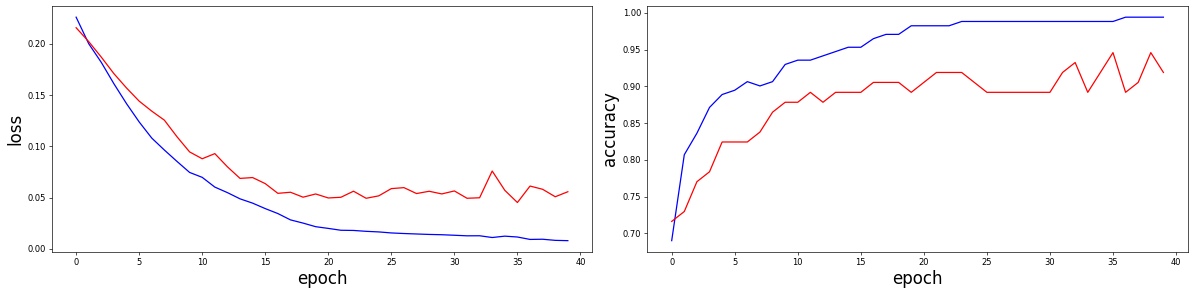

In [138]:
plot_training_info(result3)

In [139]:
y_pred = model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.95      1.00      0.97        70

    accuracy                           0.96       106
   macro avg       0.97      0.94      0.96       106
weighted avg       0.96      0.96      0.96       106


Confusion Matrix:
      Bad   Good 
Bad   32    4    
Good  0     70   


Question 2)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Network/Reg-Data.txt', header = None)

In [3]:
columnsName = []
for i in range(68):
  columnsName.append(f'f{i}')
x_data = df.loc[:, df.columns < 68]
x_data.columns = columnsName
y_data = df.loc[:, df.columns >= 68]
y_data.columns = ['x', 'y']

In [4]:
x_data = (x_data - x_data.mean()) / x_data.std()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

**1-**

In [144]:
from sklearn.linear_model import LinearRegression
regDataLinearModel = LinearRegression()
regDataLinearModel.fit(x_train, y_train)

LinearRegression()

In [145]:
y_pred = regDataLinearModel.predict(x_test)

In [146]:
from sklearn import metrics
linear_mse = metrics.mean_squared_error(y_test, y_pred)
linear_mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE value:', linear_mse)
print('MSE value:', linear_mae)

MAE value: 1053.7853410831267
MSE value: 22.733698910236402


**2-**

In [147]:
def train_model(opt, loss_func, activation_func, epoch_cnt, batch_sz=None):
  model = Sequential()
  model.add(Dense(2, input_dim = 68, activation=activation_func))
  model.compile(loss = loss_func, optimizer=opt)
  result1 = model.fit(x=x_train, y=y_train, epochs=epoch_cnt, validation_split=0.3, batch_size=batch_sz)

  y_pred = model.predict(x_test)
  mse = metrics.mean_squared_error(y_test, y_pred)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  return mse, mae

a. epoch = 10:

> Using MAE:



In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_absolute_error, 'linear', 10)

In [149]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 2295.8799388203633
MAE value: 38.44644173617631


In [ ]:
mse, mae = train_model('adam', keras.losses.mean_absolute_error, 'linear', 10)

In [151]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 2338.04670481381
MAE value: 38.89623055849995




> Using MSE:



In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_squared_error, 'linear', 10)

In [154]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1017.0525737176453
MAE value: 23.49039531473843


In [ ]:
mse, mae = train_model('adam', keras.losses.mean_squared_error, 'linear', 10)

In [156]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 2340.382272271796
MAE value: 38.877506099838115


b. epoch = 50:


> Using MAE:



In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_absolute_error, 'linear', 50)

In [158]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 2104.5732657468243
MAE value: 36.17704038824673


In [ ]:
mse, mae = train_model('adam', keras.metrics.mean_absolute_error, 'linear', 50)

In [160]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 2227.775964461696
MAE value: 37.56394597324277




> Using MSE:



In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_squared_error, 'linear', 50)

In [162]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1072.1490118250579
MAE value: 22.71478635293132


In [ ]:
mse, mae = train_model('adam', keras.losses.mean_squared_error, 'linear', 50)

In [164]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 2216.602194075476
MAE value: 37.84135029206577


**3-**

In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.metrics.mean_squared_error, 'relu', 10)

In [166]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1122.3414079570784
MAE value: 25.70754321755103


In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.metrics.mean_squared_error, 'relu', 50)

In [168]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1051.625221930315
MAE value: 22.74940209667637


**4-**

Batch Size = 16:

In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.metrics.mean_squared_error, 'relu', 50, batch_sz=16)

In [170]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1092.6481720758195
MAE value: 22.77555678250654


Batch Size = 32:

In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.metrics.mean_squared_error, 'relu', 50, batch_sz=32)

In [172]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1050.7269081868035
MAE value: 22.848892494417576


Batch Size = 128:

In [ ]:
mse, mae = train_model(keras.optimizers.SGD(learning_rate=0.01), keras.metrics.mean_squared_error, 'relu', 50, batch_sz=128)

In [174]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1056.0920530569601
MAE value: 24.463378897792886


**5-**

In [12]:
def train_MLNN(layers, opt, loss_func):
  model = Sequential()
  model.add(Dense(layers[0], input_dim = 68, activation='relu'))
  for i in range(1, len(layers)):
    model.add(Dense(layers[i], activation='relu'))
  model.compile(optimizer = opt, loss= loss_func)
  result = model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.3, batch_size=32)

  y_pred = model.predict(x_test)
  mse = metrics.mean_squared_error(y_test, y_pred)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  return mse, mae

1 hidden layer:

In [ ]:
mse, mae = train_MLNN([4, 2], keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_absolute_error)

In [28]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1382.5072448795102
MAE value: 26.841096366418977


In [ ]:
mse, mae = train_MLNN([4, 2], 'adam', keras.losses.mean_absolute_error)

In [18]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1656.9776766284879
MAE value: 29.854190628432995


In [ ]:
mse, mae = train_MLNN([4, 2], keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_squared_error)

In [26]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1405.2006791373058
MAE value: 27.04034420499262


In [ ]:
mse, mae = train_MLNN([4, 2], 'adam', keras.losses.mean_squared_error)

In [22]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1511.5483369942867
MAE value: 28.935993368822444


2 hidden layers:

In [ ]:
mse, mae = train_MLNN([8, 4, 2], keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_absolute_error)

In [30]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1255.8027953918759
MAE value: 24.20245791311535


In [ ]:
mse, mae = train_MLNN([8, 4, 2], 'adam', keras.losses.mean_absolute_error)

In [32]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1643.1227546552122
MAE value: 32.47628967423483


In [ ]:
mse, mae = train_MLNN([8, 4, 2], keras.optimizers.SGD(learning_rate=0.01), keras.losses.mean_squared_error)

In [34]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1844.0944914076144
MAE value: 34.67851026283118


In [ ]:
mse, mae = train_MLNN([8, 4, 2], 'adam', keras.losses.mean_squared_error)

In [36]:
print('MSE value:', mse)
print('MAE value:', mae)

MSE value: 1444.5030222034425
MAE value: 27.635582596918322


Question 3)

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Network/ionosphere.data', header = None)

In [38]:
data_x = df.loc[:, df.columns != 34]
data_y = df.loc[:, df.columns == 34]

In [39]:
del data_x[1]

In [40]:
data_y = pd.get_dummies(data_y)
data_y.drop(columns='34_b', inplace=True)
data_y.columns = ['Type']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

a)

First we train out auto-encoder:

In [57]:
encoder_input = keras.layers.Input(shape = (33,))
e1_layer = keras.layers.Dense(32, activation='tanh')(encoder_input)
e2_layer = keras.layers.Dense(25, activation='tanh')(e1_layer)
encoder_output = keras.layers.Dense(20, activation='tanh')(e2_layer)

d1_layer = keras.layers.Dense(25, activation='tanh')(encoder_output)
d2_layer = keras.layers.Dense(32, activation='tanh')(d1_layer)
decoder_output = keras.layers.Dense(33, activation='linear')(d2_layer)

auto_encoder = keras.Model(encoder_input, decoder_output)
auto_encoder.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [ ]:
auto_encoder.fit(x=x_train, y=x_train, validation_split=0.3, epochs = 50)

Then we use encoder part of it in our main model:

In [59]:
mm_l1 = keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1))(encoder_output)
mm_l2 = keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1))(mm_l1)
output = keras.layers.Dense(1, activation='sigmoid')(mm_l2)

main_model = keras.Model(encoder_input, output)

In [ ]:
for i in range(4):
  main_model.layers[i].trainable = False

main_model.compile(metrics=['accuracy'], loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=0.1))
result = main_model.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50)

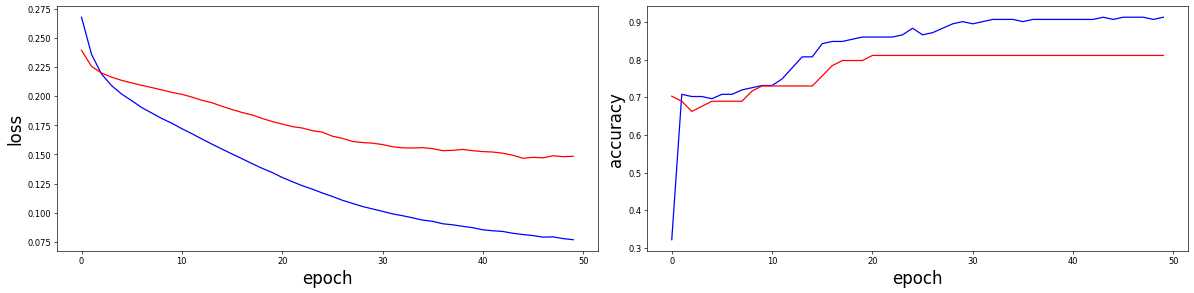

In [61]:
plot_training_info(result)

In [62]:
y_pred = main_model.predict(x=x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print_classification_reports(y_test, y_pred)

Classification Reports:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80        38
           1       0.85      0.99      0.91        68

    accuracy                           0.88       106
   macro avg       0.91      0.83      0.86       106
weighted avg       0.89      0.88      0.87       106


Confusion Matrix:
      Bad   Good 
Bad   26    12   
Good  1     67   
